#Capstone Project - The Battle of Neighborhoods (Week 4)

#Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, 
#over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage 
#the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you 
#can use the Foursquare location data to solve.

#Description of the Problem and Discussion of the Background (Introduction Section)
Tokyo is the most populous metroplitan area in the world. 
#During the daytime, specially in the morning and lunch hours, office areas provide huge opportunitiues for restaurants. 
#we will go through the benefits and pitfalls of opening a breakfast & lunch restaurants in highly densed office places.

#Steps
##Initial data preparation and future steps to start the battle of neighborhoods in Tokyo. 

![Tokyo picture](https://www.viagemmemoravel.com.br/wp-content/uploads/2017/08/tokyo.jpg)

In [ ]:
#Preparation for Data (Data Section)

##STEPS
##Get The Names of Wards, Major Districts and Population from Wikipedia
##Processing the Information From Wiki To Make Necessary Lists
##Get the Coordinates of the Major Districts
##Check and Compare with Google Search and Refine if Necessary

#Importing Libraries

In [6]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
#Names of Wards, Major Districts and Population from Wikipedia
#Ward (electoral subdivision), electoral district or unit of local government

In [7]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
print (type (response_obj))

<class 'str'>


In [8]:
soup = BeautifulSoup(response_obj,'lxml')
print (soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Special wards of Tokyo - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YDWEQpSclVx71W6opV9TZwAAAUE","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Special_wards_of_Tokyo","wgTitle":"Special wards of Tokyo","wgCurRevisionId":1005560664,"wgRevisionId":1005560664,"wgArticleId":296875,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from January 2018","Articles with permanently dead externa

In [9]:
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
Wards_Tokyo_Table

<table class="wikitable sortable">
<tbody><tr>
<th>No.
</th>
<th class="unsortable">Flag
</th>
<th>Name
</th>
<th class="unsortable" width="55px">Kanji
</th>
<th>Population<br/>(as of October 2016<sup class="plainlinks noexcerpt noprint asof-tag update" style="display:none;"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Special_wards_of_Tokyo&amp;action=edit">[update]</a></sup>)
</th>
<th>Density<br/><span style="font-size:90%;">(/km<sup>2</sup>)</span>
</th>
<th>Area<br/><span style="font-size:90%;">(km<sup>2</sup>)</span>
</th>
<th class="unsortable">Major districts
</th></tr>
<tr>
<td>01</td>
<td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commo

In [ ]:
#Processing the Information From Wiki To Make Necessary Lists

In [11]:

Name=[]
Kanji = []
Pop = []
Density = []
num = []
flag = []
Area = []
Major_District = []

for row in Wards_Tokyo_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
    print (Ward)
    if len(Ward)==8: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        flag.append(Ward[1].findAll('a')) # useless
        Name.append(Ward[2])
        Kanji.append(Ward[3].find(text=True))
        Pop.append(Ward[4])
        Area.append(Ward[5].find(text=True))
        Major_District.append(Ward[7].find(text=True))
            
#print (Pop)


#++++++++++++++++++++++++++++++++++++++++++++++
#+ Area 
#++++++++++++++++++++++++++++++++++++++++++++++

# print (Area[3]) # the first element of the area needs a replacement with the true value 5100
Area = ['5100' if x=='0' else x for x in Area]
New_Area = []

# change the type of Area list 
for l in range(len(Area)):
    x=Area[l].replace(",","")
    print (x)
    New_Area.append(x)

New_Area=[int(s) for s in New_Area]

#print (New_Area) # the list elements are already in accordance with the table

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Name of the Wards
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#print (Name) # want to select only the title part

new_names = []
for n in range(len(Name)):
    print (Name[n])
    names = Name[n].findAll('a')
    new_names.append(names) 

print (new_names)

flat_new_names_list = [item for sublist in new_names for item in sublist]
print (flat_new_names_list)

Wards_names= []
#now 
for name_wards in flat_new_names_list:
        Wards_names.append(name_wards.get('title'))

print (Wards_names)

# replace the elements in the list that contains 'Tokyo' with only the ward names
replace_names={'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
               'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 'Nakano, Tokyo':'Nakano', 
               'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}


Wards_names1 = [replace_names.get(n1,n1) for n1 in Wards_names]

#print (Wards_names1)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Population
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
# print (len(Pop))
# #print ((Pop[5].text))
population = []
for p in range(len(Pop)):
    print ((Pop[p]))
    pops = Pop[p].text[1:9]
    print (Pop[p].text[1:9])
    #populs = Pop[p].find('visibility:hidden;color:transparent;')
    population.append(pops) 
print (population)


New_population = []
for po in range(len(population)):
    xy=population[po].replace(",","")
    print (xy)
    New_population.append(xy)

New_population=[int(s1) for s1 in New_population]
# print (New_population)



#++++++++++++++++++++++++++++++++++++++++++++++++
#+ Major Districts
#++++++++++++++++++++++++++++++++++++++++++++++++

#print (Major_District)

replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya, ':'Arakawa', 'Ayase, ':'Ayase', 'Kasai, Koiwa\n':'Kasai'}


Major_District_names1 = [replace_districts.get(n2,n2) for n2 in Major_District]
#print (Major_District_names1)

[]
[<td>01</td>, <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/75px-Flag_of_Chiyoda%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/100px-Flag_of_Chiyoda%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Chiyoda,_Tokyo" title="Chiyoda, Tokyo">Chiyoda</a></td>, <td>千代田区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span><span style="visibility:hidden;color:transparent;">0</span>59,441</td>, <td><span style="visibility:hidden;color:transparent;">0</span>5,100</td>, <td><span style="visibility:hidden;color:transparent;">0</span>11.66
</td>, <t

In [ ]:
#Let's Make the Tokyo Ward and Population DataFrame

In [12]:
df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 
#print (df)
df

,Ward,Area_SqKm,Population,Major_District
1,Chiyoda,5100,59441,Nagatacho
2,Chuo,14460,147620,Nihonbashi
3,Minato,12180,248071,Odaiba
4,Shinjuku,18620,339211,Shinjuku
5,Bunkyō,19790,223389,Hongo
6,Taitō,19830,200486,Ueno
7,Sumida,18910,260358,Kinshicho
8,Koto,12510,502579,Kiba
9,Shinagawa,17180,392492,Shinagawa
10,Meguro,19110,280283,Meguro


In [ ]:
#Get the Coordinates of the Major Districts

In [25]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

df

,Ward,Area_SqKm,Population,Major_District,Latitude,Longitude,Major_Dist_Coord
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,"(35.675618, 139.7434685)"
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503,"(35.68406775, 139.77450291683806)"
3,Minato,12180,248071,Odaiba,35.619050,139.779364,"(35.619050200000004, 139.77936404588297)"
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,"(35.6937632, 139.7036319)"
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476,"(35.1753761, 137.0134764)"
6,Taitō,19830,200486,Ueno,35.711795,139.776075,"(35.711795, 139.7760755)"
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043,"(35.6963122, 139.8150431)"
8,Koto,12510,502579,Kiba,23.013134,-80.832875,"(23.0131338, -80.8328748)"
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,"(35.599252, 139.73891)"
10,Meguro,19110,280283,Meguro,35.621250,139.688014,"(35.62125, 139.688014)"


In [26]:
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)
df

,Ward,Area_SqKm,Population,Major_District,Latitude,Longitude,Major_Dist_Coord
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,"(35.675618, 139.7434685)"
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503,"(35.68406775, 139.77450291683806)"
3,Minato,12180,248071,Odaiba,35.619050,139.779364,"(35.619050200000004, 139.77936404588297)"
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,"(35.6937632, 139.7036319)"
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476,"(35.1753761, 137.0134764)"
6,Taitō,19830,200486,Ueno,35.711795,139.776075,"(35.711795, 139.7760755)"
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043,"(35.6963122, 139.8150431)"
8,Koto,12510,502579,Kiba,23.013134,-80.832875,"(23.0131338, -80.8328748)"
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,"(35.599252, 139.73891)"
10,Meguro,19110,280283,Meguro,35.621250,139.688014,"(35.62125, 139.688014)"


In [27]:
df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Ward,Area_SqKm,Population,Major_District,Latitude,Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503
3,Minato,12180,248071,Odaiba,35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476
6,Taitō,19830,200486,Ueno,35.711795,139.776075
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043
8,Koto,12510,502579,Kiba,23.013134,-80.832875
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
10,Meguro,19110,280283,Meguro,35.621250,139.688014


In [ ]:
#We have the Dataframe with Coordinates
But here we see problem with coordinates for some places like Hongo, Kiba, Omori, Kasai. So we need to replace them manually
Google search gives the values

Hongo -- 35.7088° N, 139.7601° E
Kiba -- 35.6722° N, 139.8061° E
Omori -- 35.5884° N, 139.7279° E
Kasai -- 35.6634° N, 139.8731° E

In [28]:
#df.dtypes
Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)
# #df.drop(['Longitude'], axis=1, inplace=True)
# Tokyo_df

Old latitude list:  [35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.711795, 35.6963122, 23.0131338, 35.599252, 35.62125, 35.5884735, 35.6616779, 35.6645956, 35.718123, 35.7049419, 35.7310839, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 34.929109]
Old Longitude list:  [139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7760755, 139.8150431, -80.8328748, 139.73891, 139.688014, 139.7279334, 139.6663345, 139.6987107, 139.664468, 139.649909, 139.7089164, 139.7207999, 139.78131, 139.681209, 139.638735, 139.430823, 131.4781536, 134.8600505]
[35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.711795, 35.6963122, 35.6722, 35.599252, 35.62125, 35.5884735, 35.6616779, 35.6645956, 35.718123, 35.7049419, 35.7310839, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 34.929109]
[139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7760755, 139.8150431, 13

In [ ]:
#Final Data-Frame with Coordinates of the Major District

In [19]:
Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

#Tokyo_df

#Tokyo_df.to_csv('Tokyo_df_Coord.csv', sep='\t', encoding='utf-8')



Tokyo_df

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503
3,Minato,12180,248071,Odaiba,35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476
6,Taitō,19830,200486,Ueno,35.711795,139.776075
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043
8,Koto,12510,502579,Kiba,35.672200,139.806100
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
10,Meguro,19110,280283,Meguro,35.621250,139.688014


In [ ]:
###################### end of 1st part

In [ ]:
###################### begin of 2nd part

In [ ]:
#Exploratory Data Analysis

In [29]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [ ]:
#Get The Names of Wards, Major Districts and Population from Wikipedia (from 1st part of this project)

In [31]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(response_obj,'lxml')
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
### preparation of the table 

Name=[]
Kanji = []
Pop = []
Density = []
num = []
flag = []
Area = []
Major_District = []

for row in Wards_Tokyo_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
    print (Ward)
    if len(Ward)==8: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        flag.append(Ward[1].findAll('a')) # useless
        Name.append(Ward[2])
        Kanji.append(Ward[3].find(text=True))
        Pop.append(Ward[4])
        Area.append(Ward[5].find(text=True))
        Major_District.append(Ward[7].find(text=True))
            
#print (Pop) 


#++++++++++++++++++++++++++++++++++++++++++++++
#+ Area 
#++++++++++++++++++++++++++++++++++++++++++++++

# print (Area[3]) # the first element of the area needs a replacement with the true value 5100
Area = ['5100' if x=='0' else x for x in Area]
New_Area = []

# change the type of Area list 
for l in range(len(Area)):
    x=Area[l].replace(",","")
    print (x)
    New_Area.append(x)

New_Area=[int(s) for s in New_Area]

#print (New_Area) # the list elements are already in accordance with the table

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Name of the Wards
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#print (Name) # want to select only the title part

new_names = []
for n in range(len(Name)):
    print (Name[n])
    names = Name[n].findAll('a')
    new_names.append(names) 

print (new_names)

flat_new_names_list = [item for sublist in new_names for item in sublist]
print (flat_new_names_list)

Wards_names= []
#now 
for name_wards in flat_new_names_list:
        Wards_names.append(name_wards.get('title'))

print (Wards_names)

# replace the elements in the list that contains 'Tokyo' with only the ward names
replace_names={'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
               'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 'Nakano, Tokyo':'Nakano', 
               'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}


Wards_names1 = [replace_names.get(n1,n1) for n1 in Wards_names]

#print (Wards_names1)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Population
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
# print (len(Pop))
# #print ((Pop[5].text))
population = []
for p in range(len(Pop)):
    print ((Pop[p]))
    pops = Pop[p].text[1:9]
    print (Pop[p].text[1:9])
    #populs = Pop[p].find('visibility:hidden;color:transparent;')
    population.append(pops) 
print (population)


New_population = []
for po in range(len(population)):
    xy=population[po].replace(",","")
    print (xy)
    New_population.append(xy)

New_population=[int(s1) for s1 in New_population]
# print (New_population)



#++++++++++++++++++++++++++++++++++++++++++++++++
#+ Major Districts
#++++++++++++++++++++++++++++++++++++++++++++++++


replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya, ':'Arakawa', 'Ayase, ':'Ayase', 'Kasai, Koiwa\n':'Kasai'}


Major_District_names1 = [replace_districts.get(n2,n2) for n2 in Major_District]


df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 

# use of geopy geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
# replace some of the wrong coordinates 


Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)
# #df.drop(['Longitude'], axis=1, inplace=True)
# Tokyo_df


Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

Tokyo_df

Tokyo_df.to_csv('Tokyo_df_Coord.csv')

[]
[<td>01</td>, <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/75px-Flag_of_Chiyoda%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/100px-Flag_of_Chiyoda%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Chiyoda,_Tokyo" title="Chiyoda, Tokyo">Chiyoda</a></td>, <td>千代田区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span><span style="visibility:hidden;color:transparent;">0</span>59,441</td>, <td><span style="visibility:hidden;color:transparent;">0</span>5,100</td>, <td><span style="visibility:hidden;color:transparent;">0</span>11.66
</td>, <t

Old latitude list:  [35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.711795, 35.6963122, 23.0131338, 35.599252, 35.62125, 35.5884735, 35.6616779, 35.6645956, 35.718123, 35.7049419, 35.7310839, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 34.929109]
Old Longitude list:  [139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7760755, 139.8150431, -80.8328748, 139.73891, 139.688014, 139.7279334, 139.6663345, 139.6987107, 139.664468, 139.649909, 139.7089164, 139.7207999, 139.78131, 139.681209, 139.638735, 139.430823, 131.4781536, 134.8600505]
[35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.711795, 35.6963122, 35.6722, 35.599252, 35.62125, 35.5884735, 35.6616779, 35.6645956, 35.718123, 35.7049419, 35.7310839, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 34.929109]
[139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7760755, 139.8150431, 13

#we want to concentrate on the best five wards

Chiyoda. Major District: Nagatacho
Shinjuku. Major District: Shinjuku
Shibuya. Major District: Shibuya
Chuo. Major District: Nihombashi
Shinagawa. Major District: Shinagawa
So as the next step we will use Foursquare data and obtain information on restaurants. 
With these, we can start with our battle of neighborhoods for opening a restaurant in Tokyo.

In [78]:
Tokyo_df = pd.read_csv('Tokyo_df_Coord.csv', index_col=[0])
#remove the unnamed column 
Tokyo_df.head(5)

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503
3,Minato,12180,248071,Odaiba,35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476


In [ ]:
#Get the average land price in different areas of Tokyo from Web Scrapping

In [33]:
response_obj = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
#print (type (response_obj))
soup = BeautifulSoup(response_obj,'lxml')
#print (soup.prettify())

In [34]:
Price_Tokyo_Table = soup.find('tbody')
#Price_Tokyo_Table

In [35]:
Name=[]
Avg_price = []


for row in Price_Tokyo_Table.findAll("tr"):
    
    price = row.findAll('td')
    Name.append(price[0].find(text=True))
    Avg_price.append(price[2].find(text=True))   

#print(Name)

price_df = pd.DataFrame(Name,columns=['Ward'])
price_df['Avg_price_sqKm'] = Avg_price




price_df['Avg_price_sqKm'] = price_df['Avg_price_sqKm'].map(lambda x: x.rstrip('JPY/sq.m').rstrip('0123456789'))

#print (price_df.dtypes)
# Change the average price column datatype 
Avg_price_list = price_df['Avg_price_sqKm'].tolist()
New_Avg_price = []

for pr in range(len(Avg_price_list)):
    x = Avg_price_list[pr].replace(",", "")
    New_Avg_price.append(x)


Avg_price_new=[int(s) for s in New_Avg_price]

price_df.drop(['Avg_price_sqKm'], axis=1, inplace=True)

price_df['Average_Price(SqKm)'] = New_Avg_price

price_df

,Ward,Average_Price(SqKm)
0,Chiyoda-Ku,2370567
1,Chuo-Ku,1844643
2,Minato-Ku,2029050
3,Shinjuku-Ku,869731
4,Bunkyo-Ku,948116
5,Taito-Ku,945880
6,Sumida-Ku,593725
7,Koto-Ku,651699
8,Shinagawa-Ku,776510
9,Meguro-Ku,852041


In [36]:
## Select info only for 5 relevant wards Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa. 
## 
pd.options.mode.chained_assignment = None
ward_list = ['Chiyoda-Ku', 'Chuo-Ku', 'Shinjuku-Ku', 'Shibuya-Ku', 'Shinagawa-Ku']
price_df_selected = price_df.loc[price_df['Ward'].isin(ward_list)]
price_df_selected.index = np.arange(1, len(price_df_selected) + 1)
#Ward_names = price_df_selected['Ward'].map(lambda y: str(y)[:-3]) # strip -Ku from the ward names
price_df_selected['Ward']=price_df_selected['Ward'].map(lambda y: str(y)[:-3]) 
#price_df_selected.drop(['Ward'], axis=1, inplace=True)
#price_df_selected['Ward']=Ward_names
price_df_selected

,Ward,Average_Price(SqKm)
1,Chiyoda,2370567
2,Chuo,1844643
3,Shinjuku,869731
4,Shinagawa,776510
5,Shibuya,1190323


In [37]:
## Similarly select those five wards from the Tokyo Wards Data-Frame
ward_list1 = ['Chiyoda', 'Chuo', 'Shinjuku', 'Shibuya', 'Shinagawa']
Tokyo_df_selected = Tokyo_df.loc[Tokyo_df['Ward'].isin(ward_list1)]
Tokyo_df_selected

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
13,Shibuya,15080,227850,Shibuya,35.664596,139.698711


In [38]:
# Merge the two dataframes according to the ward names 

Tokyo_df_selected_final = Tokyo_df_selected.merge(price_df_selected, on='Ward', how='left')
Tokyo_df_selected_final.index = np.arange(1, len(Tokyo_df_selected_final)+1)
Tokyo_df_selected_final.to_csv('Tokyo_5_Wards.csv')
Tokyo_df_selected_final

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm)
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,2370567
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503,1844643
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,869731
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,776510
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,1190323


In [39]:
# get Tokyo, Tokyo Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [40]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tokyo_df_selected_final['Dist_Latitude'], Tokyo_df_selected_final['Dist_Longitude'], 
                           Tokyo_df_selected_final['Major_District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_5Wards)  
    
Tokyo_5Wards

In [ ]:
#The 5 Neighbourhoods (Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa) 
#that are ready to battle for the best place to open a lunch restaurant 
#looks as above in Map, obtained using Folium

In [ ]:
#Getting Ready to Use FourSquare API

In [41]:
CLIENT_ID = 'JUJKJFJJFXP1LTUGGN55JQIAPMEMKMVGKOIZMILBKYDLPS42' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'TPYHEDWXI43VHCAAGOZPUL1QK0SPDGHV221AMQI1WUSBZRMD' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: JUJKJFJJFXP1LTUGGN55JQIAPMEMKMVGKOIZMILBKYDLPS42
My CLIENT_SECRET:TPYHEDWXI43VHCAAGOZPUL1QK0SPDGHV221AMQI1WUSBZRMD


In [ ]:
#To decide which neighborhood (read 'Ward') is best for opening a restaurant, We will explore the areas around the major districts.
#(Chiyoda: Nagatacho, Chuo: Nihonbashi, Shinjuku: Shinjuku, Shibuya: Shibuya, Shinagawa:Shinagawa)

In [ ]:
#Exploring the Major Districts
#Create the get request url (Foursquare ID and Secret are necessary)
#Number of Venues we will look for is 100 
#Radius of Search Would be 1 k.m.
#Create a json from the request object (Need requests Module)
#Create the lists Containing all the information
#From the lists create the dataframe.

In [42]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [ ]:
#Use the Function Above to Create the 
#Dataframe of Venues Around Those 5 Major Districts Belonging to the Busiest Wards of Tokyo

In [43]:
Tokyo_5_Dist_Venues = getNearbyVenues(names=Tokyo_df_selected_final['Major_District'],
                                   latitudes=Tokyo_df_selected_final['Dist_Latitude'],
                                   longitudes=Tokyo_df_selected_final['Dist_Longitude']
                                  )

Nagatacho
Nihonbashi
Shinjuku
Shinagawa
Shibuya


In [44]:
print ("Shape of the Venues Dataframe: ", Tokyo_5_Dist_Venues.shape)
Tokyo_5_Dist_Venues.tail(3)

Shape of the Venues Dataframe:  (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
497,Shibuya,35.664596,139.698711,NUMBER SUGAR,35.666434,139.706014,Candy Store
498,Shibuya,35.664596,139.698711,pivoine,35.666129,139.692082,Women's Store
499,Shibuya,35.664596,139.698711,Gyukatsu Motomura (牛かつ もと村),35.659031,139.699252,Japanese Restaurant


In [45]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_5_Dist_Venues_only_restaurant = Tokyo_5_Dist_Venues[Tokyo_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Tokyo_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Tokyo_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_5_Dist_Venues_only_restaurant.shape)
Tokyo_5_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (185, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Nagatacho,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
2,Nagatacho,35.675618,139.743469,Sushi Isshin (鮨 一新),35.672589,139.739399,Sushi Restaurant
3,Nagatacho,35.675618,139.743469,All Day Dining Origami (オールデイダイニング ORIGAMI),35.673815,139.741104,Restaurant


In [46]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Tokyo_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [ ]:
#See, above, the Most Frequently Visited Restaurants in the Best Five Districts of Tokyo.


In [47]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Tokyo_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Tokyo_5_Dist_Venues[['Venue_Category']][70:75])

There are 134 unique categories.
        Venue_Category
70  Italian Restaurant
71               Hotel
72           Jazz Club
73     Soba Restaurant
74         Comedy Club


In [ ]:
#We have seen that there are 134 unique categories in the Venues Data-Frame.
#Let's see the Frequency of Each Category

In [48]:
print (Tokyo_5_Dist_Venues['Venue_Category'].value_counts())

Japanese Restaurant              24
Sake Bar                         23
BBQ Joint                        23
Ramen Restaurant                 20
Café                             19
Bar                              17
Chinese Restaurant               15
Convenience Store                15
Hotel                            14
Sushi Restaurant                 13
Coffee Shop                      13
Dessert Shop                     10
Soba Restaurant                  10
Yoshoku Restaurant                9
French Restaurant                 9
Record Shop                       8
Pub                               8
Yakitori Restaurant               7
Italian Restaurant                7
Tonkatsu Restaurant               6
Donburi Restaurant                6
Steakhouse                        6
Seafood Restaurant                6
Beer Bar                          5
Department Store                  5
Bakery                            5
Grocery Store                     5
Bookstore                   

In [ ]:
#Create a Data-frame with the 10 Most Frequently Occuring Venue_Category

In [49]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Japanese Restaurant,24
1,Sake Bar,23
2,BBQ Joint,23
3,Ramen Restaurant,20
4,Café,19
5,Bar,17
6,Chinese Restaurant,15
7,Convenience Store,15
8,Hotel,14
9,Sushi Restaurant,13


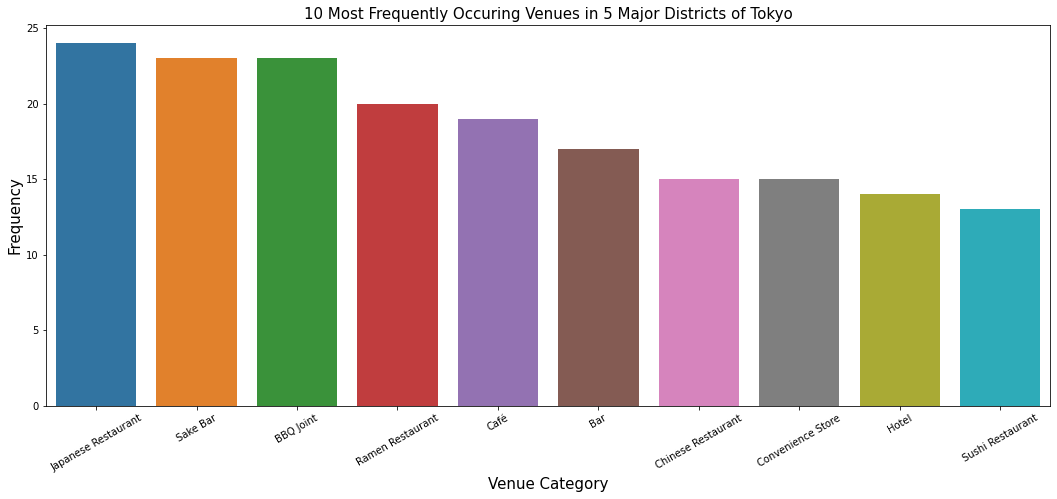

In [50]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [ ]:
#Ramen Restaurant is one of the Most Frequent Venues in 5 Major Districts of Tokyo.

![Ramen Restaurant](https://therantingpanda.files.wordpress.com/2017/12/1-img_5457.jpg)

In [ ]:
#Sushi Restaurant is one of the Most Frequent Venues in 5 Major Districts of Tokyo.

![Sushi Restaurant](https://jw-webmagazine.com/wp-content/uploads/2019/06/jw-5d1485e80dd875.56085061.jpeg)

In [51]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Tokyo_5_Dist_Venues_onehot = pd.get_dummies(Tokyo_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_5_Dist_Venues_onehot['District'] = Tokyo_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_5_Dist_Venues_onehot.columns[-1]] + list(Tokyo_5_Dist_Venues_onehot.columns[:-1])
Tokyo_5_Dist_Venues_onehot = Tokyo_5_Dist_Venues_onehot[fixed_columns]
###Tokyo_5_Dist_Venues_onehot.head(3)

In [52]:

Tokyo_5_Dist_Venues_Grouped = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Tokyo_5_Dist_Venues_Grouped.index = np.arange(1, len(Tokyo_5_Dist_Venues_Grouped)+1)
Tokyo_5_Dist_Venues_Grouped

,District,Accessories Store,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,Bath House,Bed & Breakfast,Beer Bar,Bookstore,Boutique,Brazilian Restaurant,Burger Joint,Café,Canal,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donburi Restaurant,Donut Shop,Electronics Store,Event Space,Fabric Shop,Flea Market,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Family Restaurant,Japanese Restaurant,Jazz Club,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kushikatsu Restaurant,Liquor Store,Lounge,Mexican Restaurant,Movie Theater,Multiplex,Music Store,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Racecourse,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Russian Restaurant,Sake Bar,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shopping Mall,Smoke Shop,Soba Restaurant,Soccer Field,South Indian Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Teishoku Restaurant,Tempura Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tonkatsu Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Wagashi Place,Whisky Bar,Wine Bar,Women's Store,Yakitori Restaurant,Yoshoku Restaurant
1,Nagatacho,0.00,0.01,0.00,0.00,0.00,0.07,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.06,0.00,0.00,0.00,0.06,0.01,0.02,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.09,0.02,0.03,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.02,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02
2,Nihonbashi,0.00,0.00,0.00,0.01,0.00,0.05,0.02,0.01,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.07,0.00,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.04,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.04,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.04,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.02,0.04
3,Shibuya,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.00,0.01,0.01,0.02,0.01,0.01,0.01,0.09,0.00,0.01,0.03,0.00,0.02,0.01,0.04,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.02,0.06,0.01,0.01,0.00,0.03,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.0

In [53]:
num_top_venues = 5

for places in Tokyo_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Tokyo_5_Dist_Venues_Grouped[Tokyo_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Nagatacho%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.09
1            BBQ Joint  0.07
2   Chinese Restaurant  0.06
3          Coffee Shop  0.06
4                Hotel  0.05


%%%%%%%%%Nihonbashi%%%%%%%%
                 Venue  Freq
0                 Café  0.07
1  Japanese Restaurant  0.07
2            BBQ Joint  0.05
3   Yoshoku Restaurant  0.04
4         Dessert Shop  0.04


%%%%%%%%%Shibuya%%%%%%%%
               Venue  Freq
0               Café  0.09
1        Record Shop  0.06
2                Bar  0.04
3        Coffee Shop  0.04
4  French Restaurant  0.03


%%%%%%%%%Shinagawa%%%%%%%%
               Venue  Freq
0  Convenience Store  0.15
1   Ramen Restaurant  0.08
2           Sake Bar  0.06
3          BBQ Joint  0.05
4      Grocery Store  0.05


%%%%%%%%%Shinjuku%%%%%%%%
              Venue  Freq
0          Sake Bar  0.09
1               Bar  0.08
2  Ramen Restaurant  0.06
3         BBQ Joint  0.05
4               Pub  0.04




In [ ]:
#Create a DataFrame with Top 10 Venues for Each District

In [54]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_5_Dist_Venues_Grouped['District']

for ind in np.arange(Tokyo_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,Japanese Restaurant,BBQ Joint,Coffee Shop,Chinese Restaurant,Hotel,Szechuan Restaurant,Ramen Restaurant,Kaiseki Restaurant,Theater,Dessert Shop
2,Nihonbashi,Japanese Restaurant,Café,BBQ Joint,Yoshoku Restaurant,Dessert Shop,Soba Restaurant,Hotel,Department Store,French Restaurant,Chinese Restaurant
3,Shibuya,Café,Record Shop,Coffee Shop,Bar,Chinese Restaurant,Sushi Restaurant,Sake Bar,French Restaurant,Japanese Restaurant,Ramen Restaurant
4,Shinagawa,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Soba Restaurant,Yakitori Restaurant
5,Shinjuku,Sake Bar,Bar,Ramen Restaurant,BBQ Joint,Pub,Japanese Restaurant,Department Store,Dessert Shop,Thai Restaurant,Movie Theater


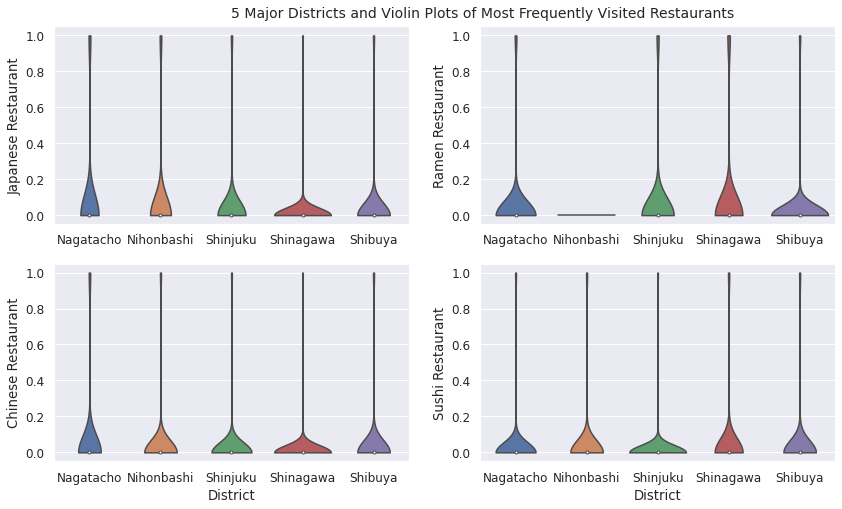

In [55]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Japanese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Ramen Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Chinese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Sushi Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

[52, 42, 27, 33, 31]


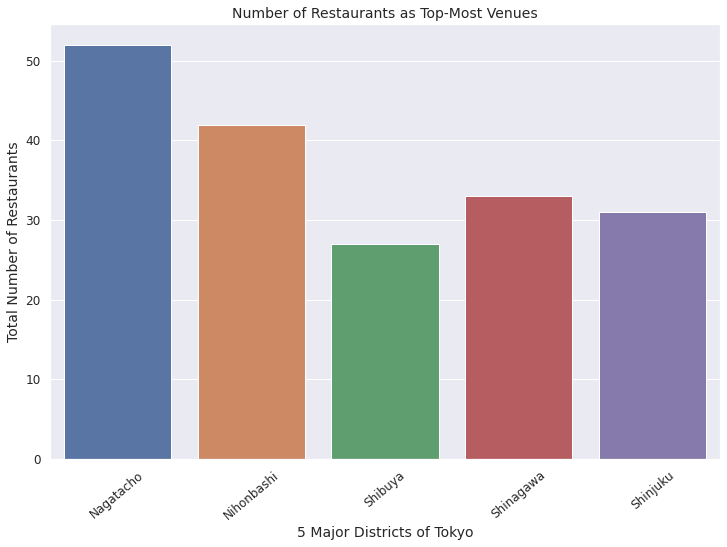

In [56]:
#try groupby to play with restaurant 
Tokyo_5_Dist_Venues_restaurant = Tokyo_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tokyo_5_Dist_Venues_restaurant_df = Tokyo_5_Dist_Venues_restaurant.to_frame().reset_index()
Tokyo_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant']
#Tokyo_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Tokyo_5_Dist_Venues_restaurant))
Tokyo_5_Dist_Venues_restaurant_df.index = np.arange(1, len(Tokyo_5_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_restaurant_df.shape)
#print (Tokyo_5_Dist_Venues_restaurant_df.head(5))
#print (type(Tokyo_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tokyo_5_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Tokyo_5_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [ ]:
#Clustering the Tokyo Districts (Neighborhoods) using K-Means

In [57]:
# set number of clusters
kclusters = 3

Tokyo_grouped_clustering = Tokyo_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [1 1 2 0 2]


In [58]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_District')

Tokyo_5_Dist_Coordinate_Cluster_merged.head()

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,2370567,1,Japanese Restaurant,BBQ Joint,Coffee Shop,Chinese Restaurant,Hotel,Szechuan Restaurant,Ramen Restaurant,Kaiseki Restaurant,Theater,Dessert Shop
2,Chuo,14460,147620,Nihonbashi,35.684068,139.774503,1844643,1,Japanese Restaurant,Café,BBQ Joint,Yoshoku Restaurant,Dessert Shop,Soba Restaurant,Hotel,Department Store,French Restaurant,Chinese Restaurant
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,869731,2,Sake Bar,Bar,Ramen Restaurant,BBQ Joint,Pub,Japanese Restaurant,Department Store,Dessert Shop,Thai Restaurant,Movie Theater
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,776510,0,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Soba Restaurant,Yakitori Restaurant
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,1190323,2,Café,Record Shop,Coffee Shop,Bar,Chinese Restaurant,Sushi Restaurant,Sake Bar,French Restaurant,Japanese Restaurant,Ramen Restaurant


In [59]:
# create map
map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
#Final Map of 3 Clusters With Radius of the Clusters Representing Number of Restaurants in Each District

In [60]:
# create map
map_restaurants10 = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [ ]:
#Explore the 3 Clusters

In [61]:
Tokyo_Cluster1 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Tokyo_Cluster1.shape[0]))
Tokyo_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Shinagawa,35.599252,139.73891,776510,0,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Soba Restaurant,Yakitori Restaurant


In [62]:
Tokyo_Cluster2 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster2

No of Neighbourhood in Cluster Label 1: 2


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,35.675618,139.743469,2370567,1,Japanese Restaurant,BBQ Joint,Coffee Shop,Chinese Restaurant,Hotel,Szechuan Restaurant,Ramen Restaurant,Kaiseki Restaurant,Theater,Dessert Shop
2,Nihonbashi,35.684068,139.774503,1844643,1,Japanese Restaurant,Café,BBQ Joint,Yoshoku Restaurant,Dessert Shop,Soba Restaurant,Hotel,Department Store,French Restaurant,Chinese Restaurant


In [63]:
Tokyo_Cluster3 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Tokyo_Cluster3.shape[0]))
Tokyo_Cluster3

No of Neighbourhood in Cluster Label 2: 2


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shinjuku,35.693763,139.703632,869731,2,Sake Bar,Bar,Ramen Restaurant,BBQ Joint,Pub,Japanese Restaurant,Department Store,Dessert Shop,Thai Restaurant,Movie Theater
5,Shibuya,35.664596,139.698711,1190323,2,Café,Record Shop,Coffee Shop,Bar,Chinese Restaurant,Sushi Restaurant,Sake Bar,French Restaurant,Japanese Restaurant,Ramen Restaurant
